# Data Visualization
This notebook is a walkthrough of data acquired from the Java code in the stringhashing folder of this repository across the 10,000 most common English words. Markdown cells and Python comments will be placed throughout as nessiary for explination.

In [2]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the CSV data into a Pandas dataframe
collisionData = pd.read_csv('./collisions.csv')
timeData = pd.read_csv('./averagetime.csv')

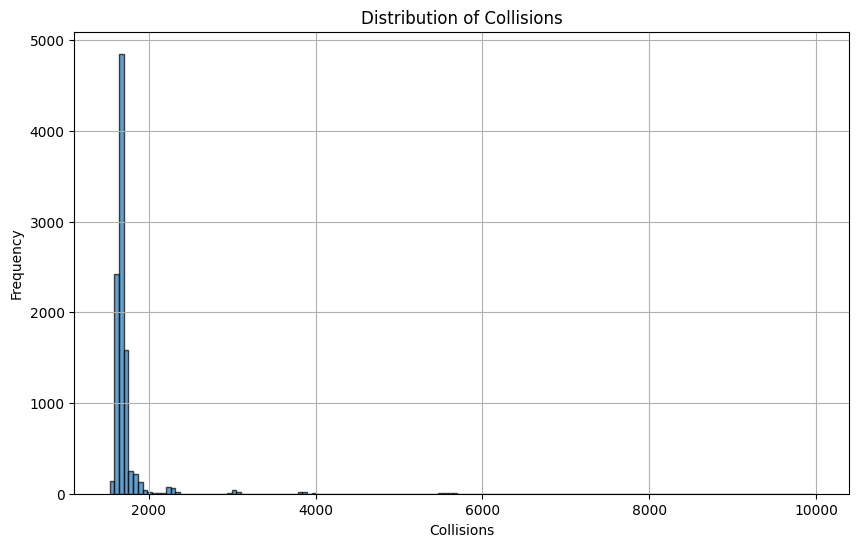

Minimum:  1533
Maximum:  9974
Median:  1671.0


In [4]:
# Create Collision histogram
plt.figure(figsize=(10, 6))
plt.hist(collisionData['Collisions'], bins=150, alpha=0.7, edgecolor='black')

plt.xlabel('Collisions')
plt.ylabel('Frequency')
plt.title('Distribution of Collisions')

plt.grid(True)
plt.show()
print("Minimum: ", collisionData['Collisions'].min())
print("Maximum: ", collisionData['Collisions'].max())
print("Median: ", collisionData['Collisions'].median())

This chart tells us a few things. Firstly, most of the bases have a similar amount of collisions, meaning we have many options to choose from. Secondly, while there are many options to choose from there are a lot we can rule out on the basis of not dispersing the Strings across the Hash Table evenly enough. While it would be easy to select the minimum value and have the optimally-dispersed Hash Table, this is not nessiarilly the most computationally efficient. We also need to analyize the time cost of each of these bases.

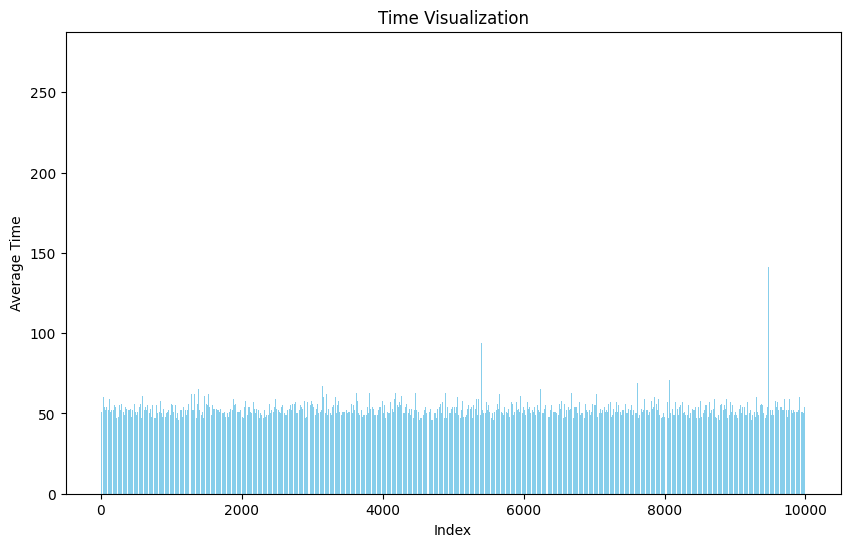

In [5]:
# Time chart
plt.figure(figsize=(10, 6))
plt.bar(timeData['Index'], timeData['Time'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Average Time')
plt.title('Time Visualization');

As you can see Java's internal optimization allows for the time to remain relatively constant as the values get larger and larger. That being said, there are clearly some outliers and in the next cell we will see how the time is distributed.

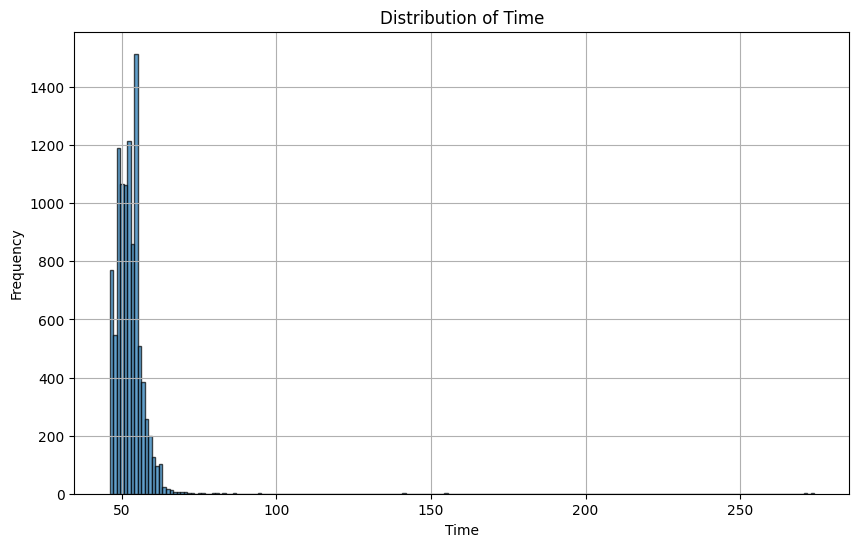

Minimum:  46
Maximum:  274
Median:  52.0


In [6]:
plt.figure(figsize=(10, 6))
plt.hist(timeData['Time'], bins=200, alpha=0.7, edgecolor='black')

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')

plt.grid(True)
plt.show()
print("Minimum: ", timeData['Time'].min())
print("Maximum: ", timeData['Time'].max())
print("Median: ", timeData['Time'].median())

The optimization becomes even more aparent here. Almost all of the operations happen within a relatively small margin of each other except for a few outliers. The difference between the minimum and maximum values along with the median value shows just how tightly distributed these times are. Keep in mind that each time entry is the average time for that hasinging number across the 10,000 most common English words, so we are getting a large sample for each data point. It is clear that we have a large amount of numbers to choose from that will meet the speed requirement of the hashing algorithm.

In [7]:
# Dataframe partitioning for analysis
evenCollisions = collisionData[collisionData.Index %2==0]
evenTimes = timeData[timeData.Index %2==0]

oddCollisions = collisionData[collisionData.Index %2==1]
oddTimes = timeData[timeData.Index %2==1]

primeCollisions = collisionData[collisionData.Index.apply(lambda x: x > 1 and all(x % i != 0 for i in range(2, int(x**0.5) + 1)))]
primeTimes = timeData[timeData.Index.apply(lambda x: x > 1 and all(x % i != 0 for i in range(2, int(x**0.5) + 1)))]

compositeCollisions = collisionData[~collisionData.Index.isin(primeCollisions.Index)]
compositeTimes = timeData[~timeData.Index.isin(primeTimes.Index)]

In [8]:
# Average collisions for partitions # TODO: Add times for each
print("Composite indices")
print("Mean: ", compositeCollisions.Collisions.mean(axis=0))
print("Median: ", compositeCollisions.Collisions.median(axis=0))
print("Average time: ", compositeTimes.Time.mean(axis=0),"\n")

print("Prime indices")
print("Mean: ", primeCollisions.Collisions.mean(axis=0))
print("Median: ", primeCollisions.Collisions.median(axis=0))
print("Average time: ", primeTimes.Time.mean(axis=0),"\n")


print("Even indices")
print("Mean: ", evenCollisions.Collisions.mean(axis=0))
print("Median: ", evenCollisions.Collisions.median(axis=0))
print("Average time: ", evenTimes.Time.mean(axis=0),"\n")


print("Odd indices")
print("Mean: ", oddCollisions.Collisions.mean(axis=0))
print("Median: ", oddCollisions.Collisions.median(axis=0))
print("Average time: ", oddTimes.Time.mean(axis=0),"\n")

Composite indices
Mean:  1735.0329494926461
Median:  1672.0
Average time:  52.40303272146848 

Prime indices
Mean:  1682.7908868999186
Median:  1667.0
Average time:  52.086248982912934 

Even indices
Mean:  1781.6848
Median:  1677.0
Average time:  52.3794 

Odd indices
Mean:  1675.54
Median:  1667.0
Average time:  52.3488 



The above highlights some interesting pattens in the data that may or may not be suprising to you depending on your familiarity with number theory.

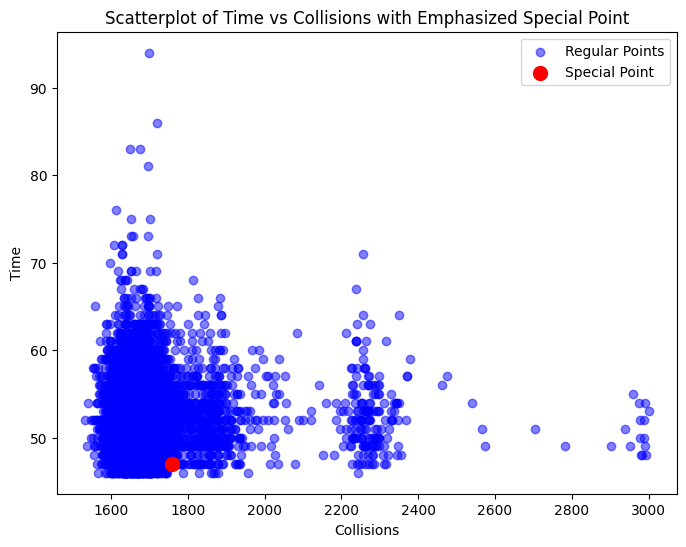

In [12]:
merged_df = pd.merge(timeData, collisionData, on='Index')
merged_df = merged_df[(merged_df['Collisions'] <= 3000) & (merged_df['Time'] <= 100)]

# Define the special point
special_index = 31  # Replace with your special index value
special_point = merged_df.loc[merged_df['Index'] == special_index]

# Create a scatterplot for regular points
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Collisions'], merged_df['Time'], color='blue', alpha=0.5, label='Bases')

# Emphasize the special point
plt.scatter(special_point['Collisions'], special_point['Time'], color='red', marker='o', s=100, label='31')

# Set labels and title
plt.xlabel('Collisions')
plt.ylabel('Time')
plt.title('Time vs Collisions')

plt.legend()
plt.show()


This chart may be suprising to some. You may think, as I did, that Java would have selected the number closest to the origin in this chart. After all, that would satisfy both the time and dispersion requirements for a good hashing algorithm. There are a few reasons that I believe this is not the case:
1. Java's hashing algorithm is not perfect: many wonderful articles have been written online about hashing algorithms and the history of Java in relation to them. Spoiler alert: designing good hashing algorithms is very challenging. In addition, hashing algorithms are an integral part of the Hash Table data structure and updating the hasing algorithm for strings could potentially break backwards compatibility.
1. This dataset is not perfect: while it would be nice to know that the input to the hashing function would be limited to the dataset I used, programmers can create any combination of charecters and the function. [This](https://web.archive.org/web/20190119000003/https://blogs.msdn.microsoft.com/ericlippert/2003/09/19/arrrrr-capn-eric-be-learnin-about-threadin-the-harrrrd-way/) blog post details an unexpected use case when msn.com attempted to store zipcodes in a Hash Table that caused enough collisions to significantly slow down performance. The challenging part about hashing strings is that you cannot write unit tests for every single string.
1. 31 is optimized for the expansion of HashTables: This test data was run on a Hash Table with a load factor of approximately 0.75, meaning the size of the internal array was fixed. It possibile that if you run this test across a varity of array sizes 31 eventually comes out on top.

Overall we can see that, despite 31 not being optimal in this test case, it still produces a hasing function that is efficient enough for most use cases. That being said Java does give you the flexibility to create your own hashing algorithm, which I invite you to do in an attemot to beat Java. 